In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
train = pd.read_csv('datasets/train_data.csv')
test = pd.read_csv('datasets/test_data.csv')

In [3]:
train.head()

,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,5,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,5,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,5,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,5,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,5,STANDING


In [5]:
# seperating target variables
x_train = train.drop(['subject','Activity', 'ActivityName'], axis = 1)
y_train = train.ActivityName

x_test = test.drop(['subject','Activity', 'ActivityName'], axis = 1)
y_test = test.ActivityName

In [7]:
print('xtrain  and ytrain: {} and {}'.format(x_train.shape,y_train.shape))
print('xtest  and ytest: {} and {}'.format(x_test.shape,y_test.shape))

xtrain  and ytrain: (7352, 561) and (7352,)
xtest  and ytest: (2947, 561) and (2947,)


In [8]:
# creating data labels
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

# Creating some utility function for plotting and modelling 

In [9]:
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
plt.rcParams["font.family"] = 'DejaVu Sans'


In [28]:
# plotting confusion matrix
def plot_confusion_matrix(cm,classes,normalize=False,title='Confusion Matrix', cmap = plt.cm.Blues):
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:, np.newaxis]
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks,classes)
    
    fmt = '.2f' if normalize else 'd'
    thrsh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j],fmt),
                horizontalalignment='center',
                color='white' if cm[i,j]> thrsh else 'black')
        
    plt.tight_layout()
    plt.xlabel('True labels')
    plt.ylabel('Predicted labels')

In [44]:
# function to run any model with some specifics

import datetime as dt

def perform_model(algo, xtrain,ytrain,xtest,ytest, class_labels,cm_normalize=True,print_cm=True,cm_cmap = plt.cm.Greens):
    results = dict()
    #training the model
    train_time = dt.datetime.now()
    print('training the model....')
    algo.fit(xtrain,ytrain)
    print('-------training completed---------')
    train_time_end = dt.datetime.now()
    results['Training_time'] = train_time_end-train_time
    print('training time(HH:MM:SS.ms)-{}\n\n'.format(results['Training_time']))
    
    #predicting the data
    print('Predicting on the test data')
    test_start_time = dt.datetime.now()
    y_pred = algo.predict(xtest)
    time_end = dt.datetime.now()
    print('Done....')
    results['Test_time'] = time_end - test_start_time
    print('test time(HH:MM:SS.ms)-{}\n\n'.format(results['Test_time']))
    results['Predicted'] = y_pred
    
    # calculating the accuracies
    
    accuracy = metrics.accuracy_score(y_true = ytest,y_pred=y_pred)
    results['Accuracy'] = accuracy
    print("-------------------------------")
    print('|      Accuracy        |')
    print("-------------------------------")
    print('\n    {}\n\n'.format(accuracy))
    
    # confusion matrixs
    
    cm = metrics.confusion_matrix(ytest,y_pred)
    results['confusion_matrix'] = cm
    if print_cm:
        print("-------------------------------")
        print('|      confusion_matrix        |')
        print("-------------------------------")
        print('\n    {}\n\n'.format(cm))
    
    # plotting the confusion matrix
    plt.figure(figsize=(8,8))
    plt.grid()
    plot_confusion_matrix(cm,classes=class_labels, normalize=False,
                         title='Normalized confusion matrix', cmap=cm_cmap)
    plt.show()
    
    # printing classification report
    print("-------------------------------")
    print('|      Classification report        |')
    print("-------------------------------")
    classification_report = metrics.classification_report(ytest,y_pred)
    results['Classification_report'] = classification_report
    print(classification_report)
    
    # add to trained model to resulr
    results['model'] = algo
    return results

In [13]:
# method to print Gridsearch Attributes
def print_gridsearch_attributes(model):
    # Estimator that gave highest score among all the estimators formed in GridSearch
    print('--------------------------')
    print('|      Best Estimator     |')
    print('--------------------------')
    print('\n\t{}\n'.format(model.best_estimator_))


    # parameters that gave best results while performing grid search
    print('--------------------------')
    print('|     Best parameters     |')
    print('--------------------------')
    print('\tParameters of best estimator : \n\n\t{}\n'.format(model.best_params_))


    #  number of cross validation splits
    print('---------------------------------')
    print('|   No of CrossValidation sets   |')
    print('--------------------------------')
    print('\n\tTotal numbre of cross validation sets: {}\n'.format(model.n_splits_))


    # Average cross validated score of the best estimator, from the Grid Search 
    print('--------------------------')
    print('|        Best Score       |')
    print('--------------------------')
    print('\n\tAverage Cross Validate scores of best estimator : \n\n\t{}\n'.format(model.best_score_))


# Logistic Regression with grid search

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

training the model....
Fitting 3 folds for each of 12 candidates, totalling 36 fits
-------training completed---------
training time(HH:MM:SS.ms)-0:00:10.285241


Predicting on the test data
Done....
test time(HH:MM:SS.ms)-0:00:00.011058


-------------------------------
|      Accuracy        |
-------------------------------

    0.9579233118425518


-------------------------------
|      confusion_matrix        |
-------------------------------

    [[537   0   0   0   0   0]
 [  0 430  58   0   0   3]
 [  0  16 516   0   0   0]
 [  0   0   0 492   3   1]
 [  0   0   0   4 403  13]
 [  0   0   0  24   2 445]]




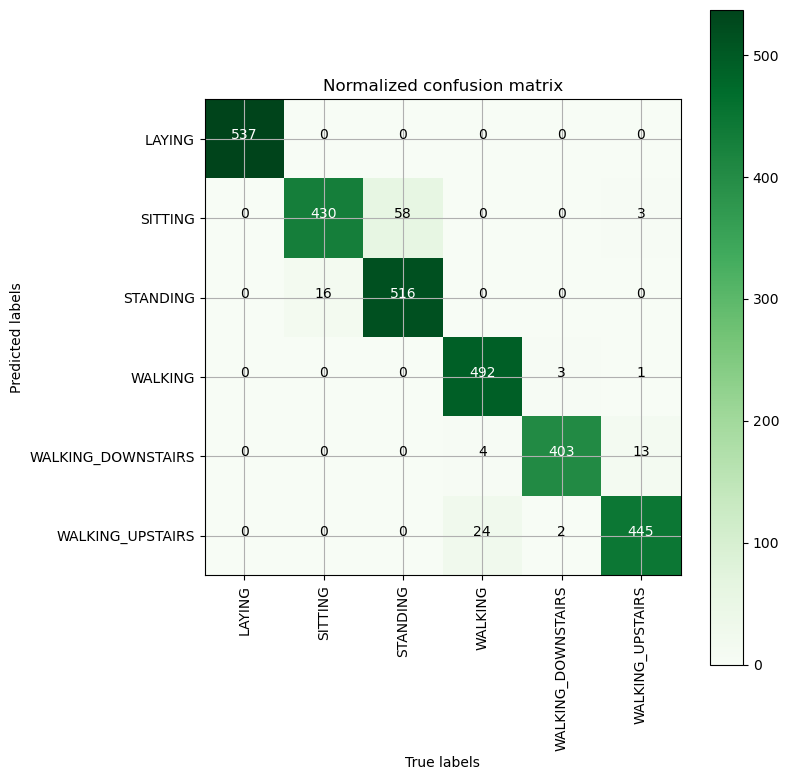

-------------------------------
|      Classification report        |
-------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.96      0.88      0.92       491
          STANDING       0.90      0.97      0.93       532
           WALKING       0.95      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.96      0.97       420
  WALKING_UPSTAIRS       0.96      0.94      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [29]:
# start grid search
parameter = {"C":[0.01,0.1,1,10,20,30], 'penalty':['l2','l1']}
log_reg = LogisticRegression()
log_reg_grid = GridSearchCV(log_reg,param_grid=parameter,cv=3,verbose=1,n_jobs=-1)
log_reg_grid_result = perform_model(log_reg_grid,x_train,y_train,x_test,y_test,class_labels=labels)

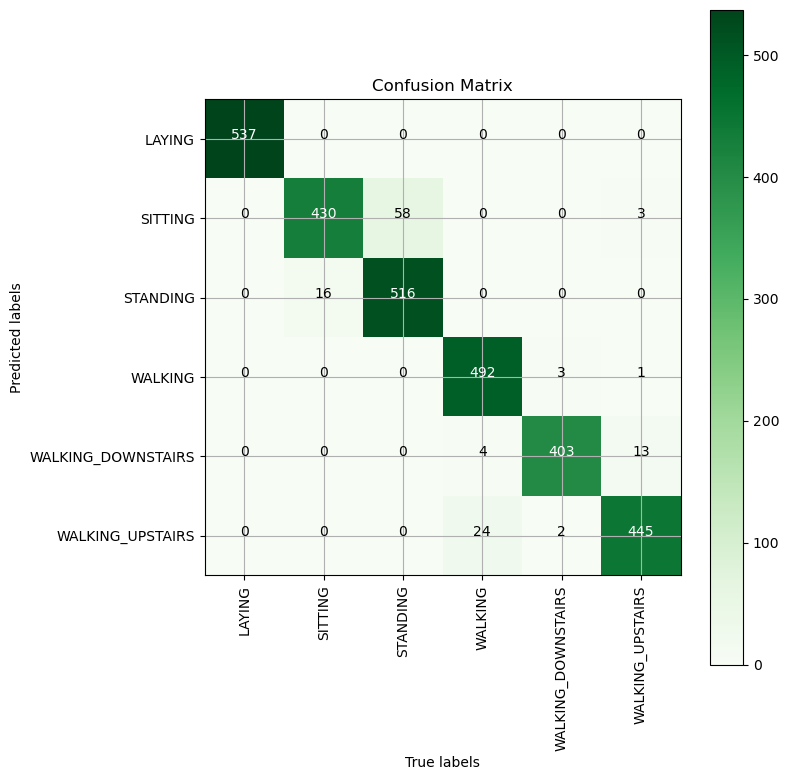

In [31]:
plt.figure(figsize=(8,8))
plt.grid()
plot_confusion_matrix(log_reg_grid_result['confusion_matrix'], classes=labels, cmap=plt.cm.Greens, )
plt.show()

In [33]:
# observe the attributes of the model 
print_gridsearch_attributes(log_reg_grid_result['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LogisticRegression(C=1)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1, 'penalty': 'l2'}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 3

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9375695606680045



# Linear SVC with GridSearch

training the model....
Fitting 5 folds for each of 6 candidates, totalling 30 fits
-------training completed---------
training time(HH:MM:SS.ms)-0:00:42.009979


Predicting on the test data
Done....
test time(HH:MM:SS.ms)-0:00:00.011147


-------------------------------
|      Accuracy        |
-------------------------------

    0.9657278588394977


-------------------------------
|      confusion_matrix        |
-------------------------------

    [[537   0   0   0   0   0]
 [  2 424  61   0   0   4]
 [  0  10 521   1   0   0]
 [  0   0   0 496   0   0]
 [  0   0   0   2 413   5]
 [  0   0   0  16   0 455]]




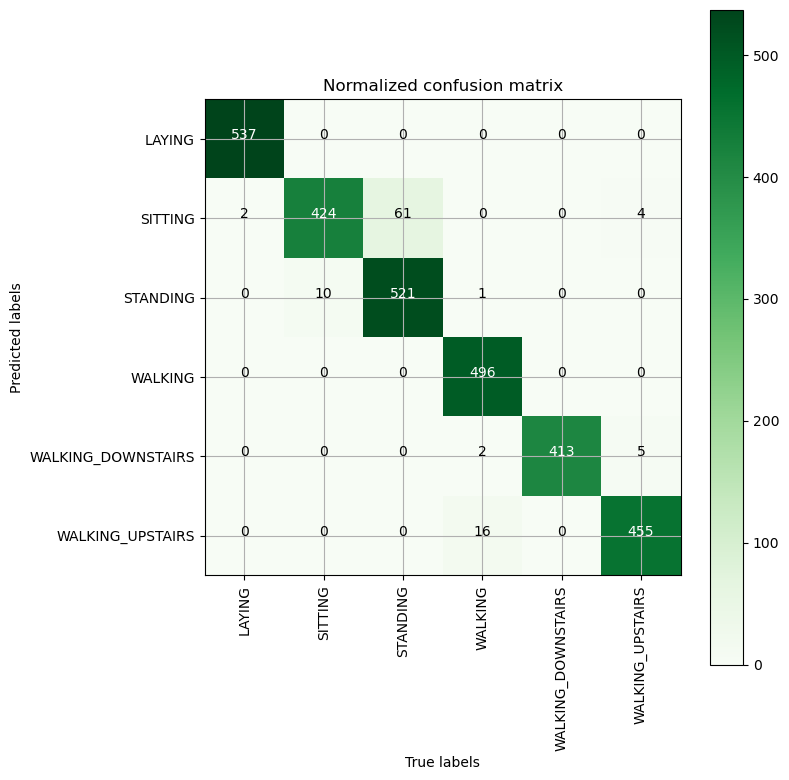

-------------------------------
|      Classification report        |
-------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.98      0.86      0.92       491
          STANDING       0.90      0.98      0.94       532
           WALKING       0.96      1.00      0.98       496
WALKING_DOWNSTAIRS       1.00      0.98      0.99       420
  WALKING_UPSTAIRS       0.98      0.97      0.97       471

          accuracy                           0.97      2947
         macro avg       0.97      0.97      0.97      2947
      weighted avg       0.97      0.97      0.97      2947



In [35]:
from sklearn.svm import LinearSVC
parameters = {'C':[0.125, 0.5, 1, 2, 8, 16]}
lr_svc = LinearSVC(tol=0.00005)
lr_svc_grid = GridSearchCV(lr_svc, param_grid=parameters, n_jobs=-1, verbose=1)
lr_svc_grid_results = perform_model(lr_svc_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [36]:
# observe the attributes of the model 
print_gridsearch_attributes(lr_svc_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	LinearSVC(C=1, tol=5e-05)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 1}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9417918302603162



# Kernel SVM with gridsearch

training the model....
-------training completed---------
training time(HH:MM:SS.ms)-0:06:56.402897


Predicting on the test data
Done....
test time(HH:MM:SS.ms)-0:00:11.112148


-------------------------------
|      Accuracy        |
-------------------------------

    0.9626739056667798


-------------------------------
|      confusion_matrix        |
-------------------------------

    [[537   0   0   0   0   0]
 [  0 441  48   0   0   2]
 [  0  12 520   0   0   0]
 [  0   0   0 489   2   5]
 [  0   0   0   4 397  19]
 [  0   0   0  17   1 453]]




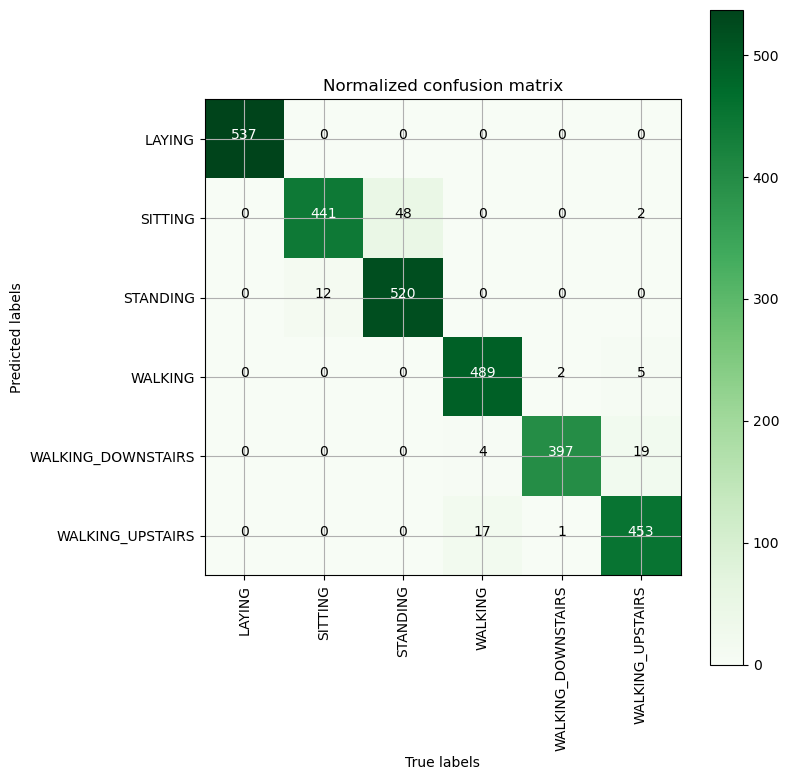

-------------------------------
|      Classification report        |
-------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.97      0.90      0.93       491
          STANDING       0.92      0.98      0.95       532
           WALKING       0.96      0.99      0.97       496
WALKING_DOWNSTAIRS       0.99      0.95      0.97       420
  WALKING_UPSTAIRS       0.95      0.96      0.95       471

          accuracy                           0.96      2947
         macro avg       0.96      0.96      0.96      2947
      weighted avg       0.96      0.96      0.96      2947



In [38]:
from sklearn.svm import SVC
parameters = {'C':[2,8,16],\
              'gamma': [ 0.0078125, 0.125, 2]}
rbf_svm = SVC(kernel='rbf')
rbf_svm_grid = GridSearchCV(rbf_svm,param_grid=parameters, n_jobs=-1)
rbf_svm_grid_results = perform_model(rbf_svm_grid, x_train, y_train, x_test, y_test, class_labels=labels)

In [39]:
# observe the attributes of the model 
print_gridsearch_attributes(rbf_svm_grid_results['model'])

--------------------------
|      Best Estimator     |
--------------------------

	SVC(C=16, gamma=0.0078125)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'C': 16, 'gamma': 0.0078125}

---------------------------------
|   No of CrossValidation sets   |
--------------------------------

	Total numbre of cross validation sets: 5

--------------------------
|        Best Score       |
--------------------------

	Average Cross Validate scores of best estimator : 

	0.9447834551903698



# decision tree with grid search

training the model....
-------training completed---------
training time(HH:MM:SS.ms)-0:00:11.159703


Predicting on the test data
Done....
test time(HH:MM:SS.ms)-0:00:00.009952


-------------------------------
|      Accuracy        |
-------------------------------

    0.8707159823549372


-------------------------------
|      confusion_matrix        |
-------------------------------

    [[537   0   0   0   0   0]
 [  0 367 124   0   0   0]
 [  0  59 473   0   0   0]
 [  0   0   0 468  20   8]
 [  0   0   0  24 346  50]
 [  0   0   0  63  33 375]]




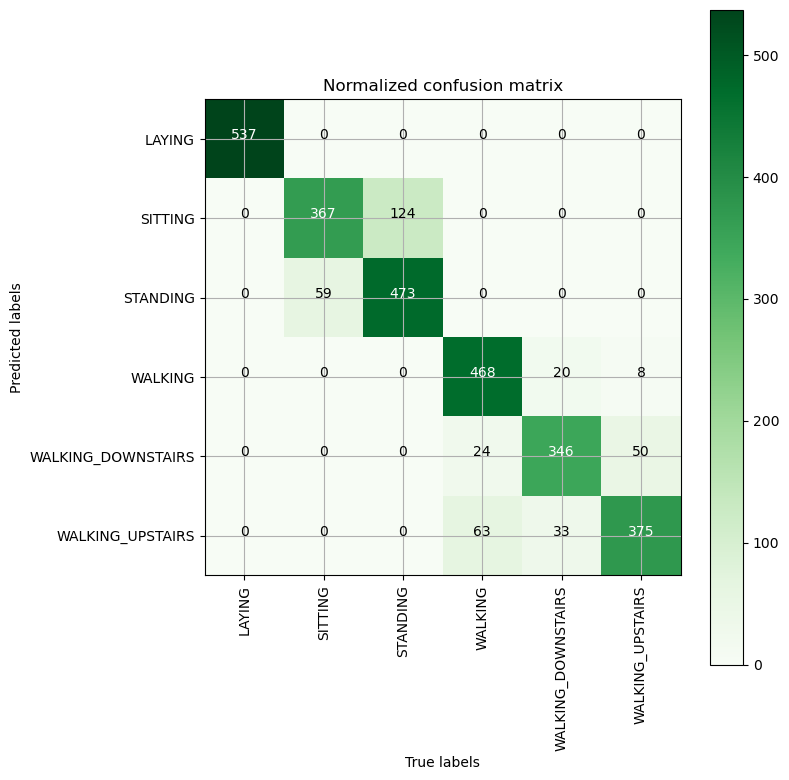

-------------------------------
|      Classification report        |
-------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.86      0.75      0.80       491
          STANDING       0.79      0.89      0.84       532
           WALKING       0.84      0.94      0.89       496
WALKING_DOWNSTAIRS       0.87      0.82      0.84       420
  WALKING_UPSTAIRS       0.87      0.80      0.83       471

          accuracy                           0.87      2947
         macro avg       0.87      0.87      0.87      2947
      weighted avg       0.87      0.87      0.87      2947

--------------------------
|      Best Estimator     |
--------------------------

	DecisionTreeClassifier(max_depth=9)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 9}

---------------------------------
|   N

In [46]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(3,10,2)}
dtree = DecisionTreeClassifier()
dt_grid = GridSearchCV(dtree,param_grid=parameters, n_jobs=-1)
dt_grid_results = perform_model(dt_grid, x_train, y_train, x_test, y_test, class_labels=labels)
print_gridsearch_attributes(dt_grid_results['model'])

# Random forest with grid search

training the model....
-------training completed---------
training time(HH:MM:SS.ms)-0:10:54.103190


Predicting on the test data
Done....
test time(HH:MM:SS.ms)-0:00:00.062502


-------------------------------
|      Accuracy        |
-------------------------------

    0.9284017645062775


-------------------------------
|      confusion_matrix        |
-------------------------------

    [[537   0   0   0   0   0]
 [  0 436  55   0   0   0]
 [  0  38 494   0   0   0]
 [  0   0   0 483   9   4]
 [  0   0   0  22 355  43]
 [  0   0   0  34   6 431]]




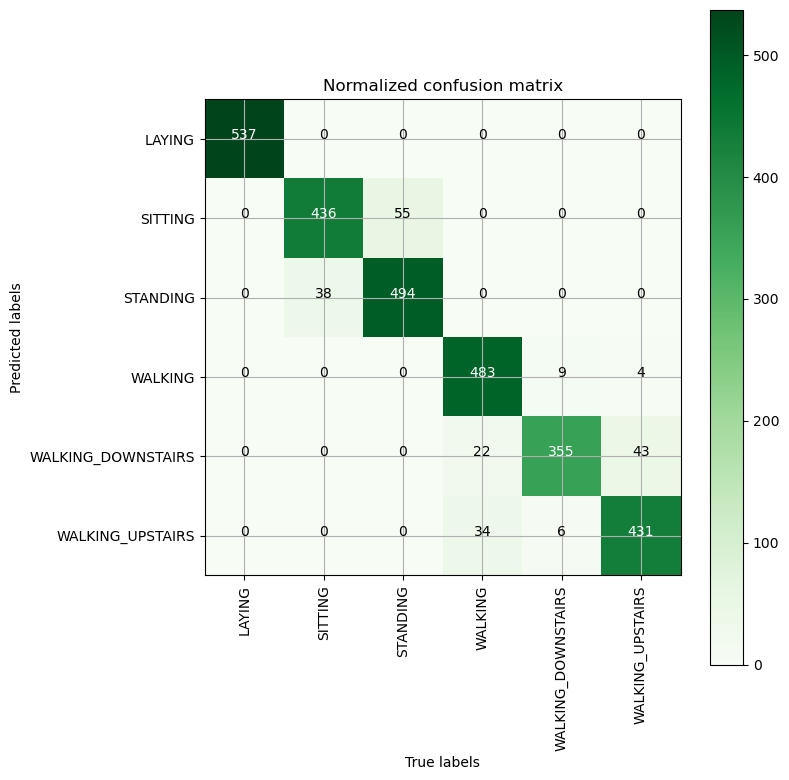

-------------------------------
|      Classification report        |
-------------------------------
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       537
           SITTING       0.92      0.89      0.90       491
          STANDING       0.90      0.93      0.91       532
           WALKING       0.90      0.97      0.93       496
WALKING_DOWNSTAIRS       0.96      0.85      0.90       420
  WALKING_UPSTAIRS       0.90      0.92      0.91       471

          accuracy                           0.93      2947
         macro avg       0.93      0.93      0.93      2947
      weighted avg       0.93      0.93      0.93      2947

--------------------------
|      Best Estimator     |
--------------------------

	RandomForestClassifier(max_depth=13, n_estimators=150)

--------------------------
|     Best parameters     |
--------------------------
	Parameters of best estimator : 

	{'max_depth': 13, 'n_estimators': 150}

In [47]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(10,201,20), 'max_depth':np.arange(3,15,2)}
rfc = RandomForestClassifier()
rfc_grid = GridSearchCV(rfc, param_grid=params, n_jobs=-1)
rfc_grid_results = perform_model(rfc_grid, x_train, y_train, x_test, y_test, class_labels=labels)
print_gridsearch_attributes(rfc_grid_results['model'])

In [ ]:
# Gradient Boosted Decision Trees With GridSearch
from sklearn.ensemble import GradientBoostingClassifier
param_grid = {'max_depth': np.arange(5,8,1), \
             'n_estimators':np.arange(130,170,10)}
gbdt = GradientBoostingClassifier()
gbdt_grid = GridSearchCV(gbdt, param_grid=param_grid, n_jobs=-1)
gbdt_grid_results = perform_model(gbdt_grid, x_train, y_train, x_test, y_test, class_labels=labels)
print_grid_search_attributes(gbdt_grid_results['model'])

training the model....


In [ ]:
# Comparing all models
print('\n                     Accuracy     Error')
print('                     ----------   --------')
print('Logistic Regression : {:.04}%       {:.04}%'.format(log_reg_grid_results['accuracy'] * 100,\
                                                  100-(log_reg_grid_results['accuracy'] * 100)))

print('Linear SVC          : {:.04}%       {:.04}% '.format(lr_svc_grid_results['accuracy'] * 100,\
                                                        100-(lr_svc_grid_results['accuracy'] * 100)))

print('rbf SVM classifier  : {:.04}%      {:.04}% '.format(rbf_svm_grid_results['accuracy'] * 100,\
                                                          100-(rbf_svm_grid_results['accuracy'] * 100)))

print('DecisionTree        : {:.04}%      {:.04}% '.format(dt_grid_results['accuracy'] * 100,\
                                                        100-(dt_grid_results['accuracy'] * 100)))

print('Random Forest       : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                           100-(rfc_grid_results['accuracy'] * 100)))
print('GradientBoosting DT : {:.04}%      {:.04}% '.format(rfc_grid_results['accuracy'] * 100,\
                                                        100-(rfc_grid_results['accuracy'] * 100)))

# Conclusions:
    **In the real world, domain-knowledge, EDA and feature-engineering matter most.**